## Capstone Final Assigment: Are All College Towns the Same?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         248 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  certifi                          2020.6.20-py36h9f0ad1d_0 --> 2020.6.20-py36h9880bd3_2



certifi-2020.6.20    | 151 KB    

In [2]:
pip install graphqlclient numpy pandas lxml

     |████████████████████████████████| 5.5MB 9.9MB/s eta 0:00:01     |█████████████████▌              | 3.0MB 9.9MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/28/86/7d/d5774d46cd045b55224b6a32f62b311d54ca2a9912b2fc6537
Successfully built graphqlclient
Note: you may need to restart the kernel to use updated packages.


## Let's go ahead and import a listing of the top 20 US Public Universities, inlcuding their locations.

In [3]:
collegetowns = pd.read_csv (r'College_Towns.csv')
collegetowns

,College,Location,National Ranking,Alumni Salary,Setting,Undergraduate Enrollment,Acceptance Rate,Graduation Rate,Cost (Out of State),Cost (In State)
0,University of Maryland--College Park,"College Park, MD",58,59900,Suburban,30511,0.44,0.69,36890,10778
1,Florida State University,"Tallahassee, FL",58,48100,City,33270,0.36,0.68,21673,6507
2,Purdue University--West Lafayette,"West Lafayette, IN",53,61600,City,33646,0.60,0.59,28794,9992
3,Ohio State University--Columbus,"Columbus, OH",53,55000,Urban,46818,0.54,0.62,33501,11517
4,University of Illinois--Urbana-Champaign,"Champaign, IL",47,61400,City,34120,0.59,0.70,34312,16862
5,University of Georgia,"Athens, GA",47,51700,City,29848,0.46,0.66,31120,12080
6,University of Wisconsin--Madison,"Madison, WI",42,55900,City,33456,0.54,0.63,38629,10741
7,University of Texas at Austin,"Austin, TX",42,58800,Urban,40163,0.32,0.66,39322,11106
8,William & Mary,"Williamsburg, VA",39,55100,Suburban,6256,0.38,0.85,46283,23362
9,University of California--Davis,"Davis, CA",39,57600,City,30982,0.39,0.63,44407,14653


## Then, let's read in some geolocation and population data in a CSV prepared from (https://simplemaps.com/data/us-zips).

In [4]:
collegegeo = pd.read_csv (r'College_Geo.csv')
collegegeo

,College,Location,Latitude,Longitude,Population
0,University of Maryland--College Park,"College Park, MD",38.996000,-76.933700,32163
1,Florida State University,"Tallahassee, FL",30.455100,-84.252600,257601
2,Purdue University--West Lafayette,"West Lafayette, IN",40.443200,-86.923900,50996
3,Ohio State University--Columbus,"Columbus, OH",39.986200,-82.985000,1562009
4,University of Illinois--Urbana-Champaign,"Champaign, IL",40.114400,-88.273500,159443
5,University of Georgia,"Athens, GA",33.950800,-83.368900,141532
6,University of Wisconsin--Madison,"Madison, WI",43.082600,-89.393100,447245
7,University of Texas at Austin,"Austin, TX",30.300400,-97.752200,1687311
8,William & Mary,"Williamsburg, VA",37.269200,-76.707600,80441
9,University of California--Davis,"Davis, CA",38.555200,-121.736500,76997


In [5]:
College_Loc = pd.merge(collegegeo, collegetowns, on="College")
College_Loc

,College,Location_x,Latitude,Longitude,Population,Location_y,National Ranking,Alumni Salary,Setting,Undergraduate Enrollment,Acceptance Rate,Graduation Rate,Cost (Out of State),Cost (In State)
0,University of Maryland--College Park,"College Park, MD",38.996000,-76.933700,32163,"College Park, MD",58,59900,Suburban,30511,0.44,0.69,36890,10778
1,Florida State University,"Tallahassee, FL",30.455100,-84.252600,257601,"Tallahassee, FL",58,48100,City,33270,0.36,0.68,21673,6507
2,Purdue University--West Lafayette,"West Lafayette, IN",40.443200,-86.923900,50996,"West Lafayette, IN",53,61600,City,33646,0.60,0.59,28794,9992
3,Ohio State University--Columbus,"Columbus, OH",39.986200,-82.985000,1562009,"Columbus, OH",53,55000,Urban,46818,0.54,0.62,33501,11517
4,University of Illinois--Urbana-Champaign,"Champaign, IL",40.114400,-88.273500,159443,"Champaign, IL",47,61400,City,34120,0.59,0.70,34312,16862
5,University of Georgia,"Athens, GA",33.950800,-83.368900,141532,"Athens, GA",47,51700,City,29848,0.46,0.66,31120,12080
6,University of Wisconsin--Madison,"Madison, WI",43.082600,-89.393100,447245,"Madison, WI",42,55900,City,33456,0.54,0.63,38629,10741
7,University of Texas at Austin,"Austin, TX",30.300400,-97.752200,1687311,"Austin, TX",42,58800,Urban,40163,0.32,0.66,39322,11106
8,William & Mary,"Williamsburg, VA",37.269200,-76.707600,80441,"Williamsburg, VA",39,55100,Suburban,6256,0.38,0.85,46283,23362
9,University of California--Davis,"Davis, CA",38.555200,-121.736500,76997,"Davis, CA",39,57600,City,30982,0.39,0.63,44407,14653


## Our Population column needs to be changed into integers, too

In [6]:
College_Loc['Population'].astype(str).astype(int)

0        32163
1       257601
2        50996
3      1562009
4       159443
5       141532
6       447245
7      1687311
8        80441
9        76997
10       46781
11      287401
12     5449398
13      202335
14      202401
15       64051
16      100416
17      322267
18      121363
19    12750807
Name: Population, dtype: int64

## Then, let's join our tables, drop some unneeded columns, and rename some columns to be simpler.  Let's also sort by population.

In [7]:
del College_Loc ['National Ranking']
del College_Loc ['Location_y']
del College_Loc ['Alumni Salary']
del College_Loc ['Acceptance Rate']
del College_Loc ['Graduation Rate']
del College_Loc ['Cost (Out of State)']
del College_Loc ['Cost (In State)']
College_Loc = College_Loc.rename(columns={'Location_x': 'Location'})
College_Loc = College_Loc.rename(columns={'Undergraduate Enrollment': 'Enrollment'})
College_Loc.sort_values('Population', inplace=True, ascending=True)
College_Loc

,College,Location,Latitude,Longitude,Population,Setting,Enrollment
0,University of Maryland--College Park,"College Park, MD",38.996000,-76.933700,32163,Suburban,30511
10,University of California--San Diego,"La Jolla, CA",32.832811,-117.271272,46781,Urban,30794
2,Purdue University--West Lafayette,"West Lafayette, IN",40.443200,-86.923900,50996,City,33646
15,University of North Carolina--Chapel Hill,"Chapel Hill, NC",35.927000,-79.039100,64051,Suburban,19355
9,University of California--Davis,"Davis, CA",38.555200,-121.736500,76997,City,30982
8,William & Mary,"Williamsburg, VA",37.269200,-76.707600,80441,Suburban,6256
16,University of Virginia,"Charlottesville, VA",38.037500,-78.485500,100416,Suburban,17011
18,University of California--Berkeley,"Berkeley, CA",37.872300,-122.276000,121363,City,31780
5,University of Georgia,"Athens, GA",33.950800,-83.368900,141532,City,29848
4,University of Illinois--Urbana-Champaign,"Champaign, IL",40.114400,-88.273500,159443,City,34120


## Even just a casual look at this table will reveal that we have some outliers - small colleges by enrollment, colleges located in very large cities.  Let's plot a scatter by those two criteria to see what it reveals.

Text(0, 0.5, 'Enrollment')

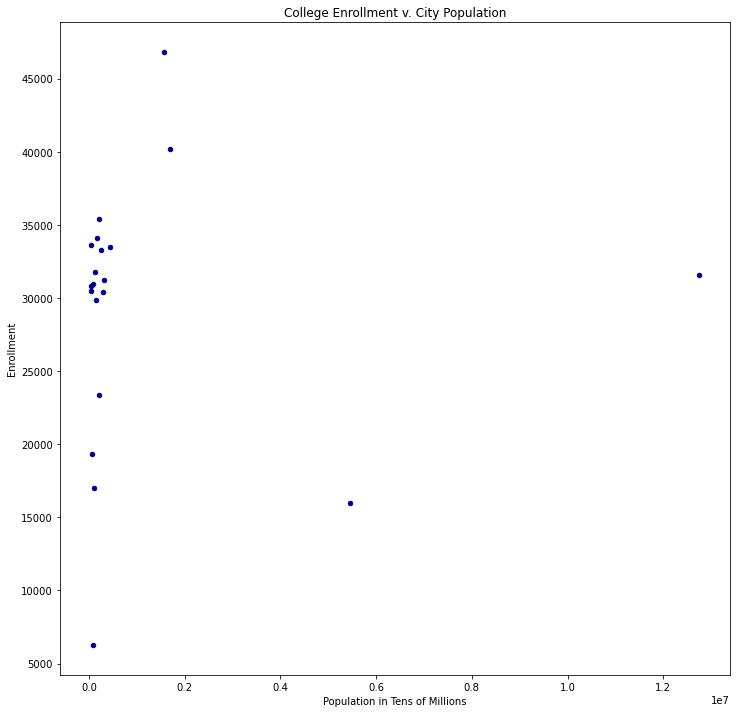

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
College_Loc.plot(kind='scatter', x='Population', y='Enrollment', figsize=(12, 12), color='darkblue')
plt.title('College Enrollment v. City Population')
plt.xlabel('Population in Tens of Millions')
plt.ylabel('Enrollment')

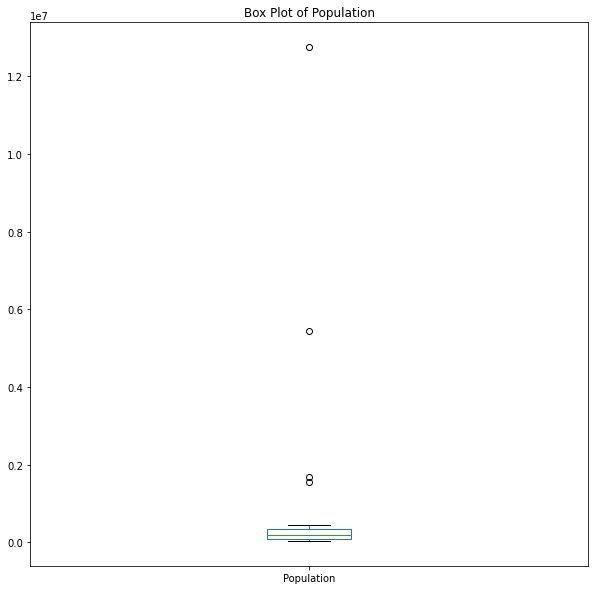

In [9]:
Pop=College_Loc[['Population']]
Pop.plot(kind='box', figsize=(10,10))
plt.title('Box Plot of Population')
plt.show()

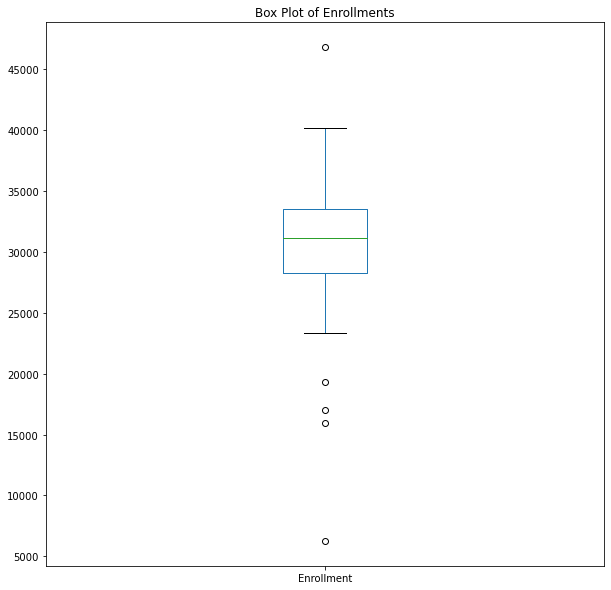

In [10]:
Enroll=College_Loc[['Enrollment']]
Enroll.plot(kind='box', figsize=(10,10))
plt.title('Box Plot of Enrollments')
plt.show()

## Already we can start to see that there are some differences among these "College Towns".  Let's rework our data by excluding some obvious outliers, and focus on large-enrollment schools in cities which hover in the low hundreds of thousands in total population.

In [11]:
College_Final = College_Loc.drop(College_Loc.index[[5,16,18,19]])
College_Final

,College,Location,Latitude,Longitude,Population,Setting,Enrollment
0,University of Maryland--College Park,"College Park, MD",38.996000,-76.933700,32163,Suburban,30511
10,University of California--San Diego,"La Jolla, CA",32.832811,-117.271272,46781,Urban,30794
2,Purdue University--West Lafayette,"West Lafayette, IN",40.443200,-86.923900,50996,City,33646
15,University of North Carolina--Chapel Hill,"Chapel Hill, NC",35.927000,-79.039100,64051,Suburban,19355
9,University of California--Davis,"Davis, CA",38.555200,-121.736500,76997,City,30982
16,University of Virginia,"Charlottesville, VA",38.037500,-78.485500,100416,Suburban,17011
18,University of California--Berkeley,"Berkeley, CA",37.872300,-122.276000,121363,City,31780
5,University of Georgia,"Athens, GA",33.950800,-83.368900,141532,City,29848
4,University of Illinois--Urbana-Champaign,"Champaign, IL",40.114400,-88.273500,159443,City,34120
13,University of Florida,"Gainesville, FL",29.680400,-82.345800,202335,Suburban,35405


## OK, so that's a good list of 17 college towns with outliers removed.  We probably can now start our more nuanced comparions. So let's start making some Foursquare API calls to see what kinds of amenities and venues are in the cities we've included.  We'll start with my personal favorite, Madison, WI.

In [12]:
CLIENT_ID = '3N1T35OHDYCLKIQBSW4GMJNZGRJBM0G30AOH1JEQCVNYHPUY'
CLIENT_SECRET = 'TIMXZTFLNVJU2LXH5USF0Q1EGJZEHWNTG4EAPC44BIQRGUXN'
VERSION = '20201001'
lat = College_Final.loc[15, 'Latitude']
long = College_Final.loc[15, 'Longitude']

LIMIT = 150
radius = 2000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    long, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f8b32df3f31f81937842ac4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Chapel Hill',
  'headerFullLocation': 'Chapel Hill',
  'headerLocationGranularity': 'city',
  'totalResults': 94,
  'suggestedBounds': {'ne': {'lat': 35.945000018000016,
    'lng': -79.01691281628037},
   'sw': {'lat': 35.90899998199998, 'lng': -79.06128718371964}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adb32c8f964a520d62421e3',
       'name': 'Sunrise Biscuit Kitchen',
       'location': {'address': '1305 E Franklin St',
        'crossStreet': 'at Meadowbrook Dr',
        'lat': 35.92757,
        'lng': -79.0355,
      

## Now, let's start to add some structure that shows what what kinds of venue types appear, so that we can start to make comparisons.

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
CLIENT_ID = '3N1T35OHDYCLKIQBSW4GMJNZGRJBM0G30AOH1JEQCVNYHPUY'
CLIENT_SECRET = 'TIMXZTFLNVJU2LXH5USF0Q1EGJZEHWNTG4EAPC44BIQRGUXN'
VERSION = '20201001'
lat = College_Final.loc[0, 'Latitude']
long = College_Final.loc[0, 'Longitude']

LIMIT = 100
radius = 2000

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
               
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
             
        results = requests.get(url).json()["response"]['groups'][0]['items']
            
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['College', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
College_venues = getNearbyVenues(names=College_Final['College'],
                                   latitudes=College_Final['Latitude'],
                                   longitudes=College_Final['Longitude']
                                  )

University of Maryland--College Park
University of California--San Diego
Purdue University--West Lafayette
University of North Carolina--Chapel Hill
University of California--Davis
University of Virginia
University of California--Berkeley
University of Georgia
University of Illinois--Urbana-Champaign
University of Florida
University of California--Santa Barbara
Florida State University
University of California--Irvine
University of Michigan--Ann Arbor
University of Wisconsin--Madison
University of Texas at Austin


## Let's test the outcomes, by looking at the Head and Tail of the resultant file.

In [16]:
College_venues.head()

,College,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,University of Maryland--College Park,38.996,-76.9337,Smile Herb Shop,38.995215,-76.926970,Gourmet Shop
1,University of Maryland--College Park,38.996,-76.9337,NuVegan Café,38.991512,-76.933671,Vegetarian / Vegan Restaurant
2,University of Maryland--College Park,38.996,-76.9337,Food Factory,38.990998,-76.932786,Falafel Restaurant
3,University of Maryland--College Park,38.996,-76.9337,The Jerk Pit,39.002683,-76.931323,Caribbean Restaurant
4,University of Maryland--College Park,38.996,-76.9337,sweetgreen,38.992282,-76.933546,Salad Place


In [17]:
College_venues.tail()

,College,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1487,University of Texas at Austin,30.3004,-97.7522,Taco Shack,30.308235,-97.741581,Mexican Restaurant
1488,University of Texas at Austin,30.3004,-97.7522,SUBWAY,30.307904,-97.749474,Sandwich Place
1489,University of Texas at Austin,30.3004,-97.7522,Speedway Market,30.295124,-97.736541,Food & Drink Shop
1490,University of Texas at Austin,30.3004,-97.7522,Anytime Fitness,30.300650,-97.739160,Gym / Fitness Center
1491,University of Texas at Austin,30.3004,-97.7522,Lucky Lab Coffee Co.,30.288375,-97.742111,Coffee Shop


## Coffee shops, vegan restaurants, and gyms?  Seems like we're on the right path for college towns.  And we've set our radius far enough, with a limit, so that we have a good cross-section of venues for each (60 or more).

In [18]:
College_venues.groupby('College').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
College,,,,,,
Florida State University,66,66,66,66,66,66
Purdue University--West Lafayette,90,90,90,90,90,90
University of California--Berkeley,100,100,100,100,100,100
University of California--Davis,100,100,100,100,100,100
University of California--Irvine,100,100,100,100,100,100
University of California--San Diego,88,88,88,88,88,88
University of California--Santa Barbara,100,100,100,100,100,100
University of Florida,67,67,67,67,67,67
University of Georgia,100,100,100,100,100,100


## So what are the general characteristics of these venues?  Which types of venues are the most common in our college towns?  Let's look at the top 5 to see if there are any surprises.

In [19]:
Popular = College_venues.groupby('Venue Category').count()
Popular.sort_values('College', ascending=False).head()

,College,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,70,70,70,70,70,70
Pizza Place,61,61,61,61,61,61
Sandwich Place,46,46,46,46,46,46
American Restaurant,40,40,40,40,40,40
Bar,38,38,38,38,38,38


## Not really!  College kids love to eat, drink, and congregate, so this seems pretty much as expected.

## So let's now turn our attention to measure of homogeneity among these college towns.  Is each just a fascimile of the others?  We definitely have things we'd expect to see, so it'll be interesting to dig more deeply to see what's UNIQUE about these towns and/or how they tend to cluster.

In [20]:
OH = pd.get_dummies(College_venues[['Venue Category']], prefix="", prefix_sep="")

OH['College'] = College_venues['College'] 

fixed_columns = [OH.columns[-1]] + list(OH.columns[:-1])
OH = OH[fixed_columns]

In [21]:
College_grouped = OH.groupby('College').mean().reset_index()
College_grouped.head()

,College,ATM,Accessories Store,Airport,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Baseball Diamond,College Basketball Court,College Bookstore,College Cafeteria,College Football Field,College Gym,College Quad,College Science Building,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Courthouse,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pelmeni House,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Student Center,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Florida State University,0.000000,0.015152,0.0,0.030303,0.00,0.0,0.0,0.0,0.00,0.00,0.015152,0.00,0.000000,0.0,0.015152,0.0,0.015152,0.000000,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.0,0.00,0.030303,0.0,0.00,0.030303,0.00,0.0,0.00,0.030303,0.01

In [22]:
num_top_venues = 5

for hood in College_grouped['College']:
    print("----"+hood+"----")
    temp = College_grouped[College_grouped['College'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Florida State University----
                    venue  freq
0          Clothing Store  0.06
1           Grocery Store  0.05
2             Gas Station  0.05
3                 Theater  0.03
4  Furniture / Home Store  0.03


----Purdue University--West Lafayette----
                  venue  freq
0        Sandwich Place  0.06
1              Pharmacy  0.04
2           Coffee Shop  0.04
3  Fast Food Restaurant  0.03
4                  Bank  0.03


----University of California--Berkeley----
                venue  freq
0         Coffee Shop  0.05
1  Mexican Restaurant  0.04
2                Café  0.04
3                Park  0.04
4         Pizza Place  0.04


----University of California--Davis----
                venue  freq
0         Pizza Place  0.07
1         Coffee Shop  0.06
2  Mexican Restaurant  0.06
3      Ice Cream Shop  0.04
4     Bubble Tea Shop  0.04


----University of California--Irvine----
                  venue  freq
0           Pizza Place  0.08
1    Chinese Restaurant  

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['College']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

CollegeSorted = pd.DataFrame(columns=columns)
CollegeSorted['College'] = College_grouped['College']

for ind in np.arange(College_grouped.shape[0]):
    CollegeSorted.iloc[ind, 1:] = return_most_common_venues(College_grouped.iloc[ind, :], num_top_venues)

CollegeSorted

,College,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Florida State University,Clothing Store,Grocery Store,Gas Station,Burger Joint,Furniture / Home Store,Convenience Store,Park,Pizza Place,Department Store,Sandwich Place
1,Purdue University--West Lafayette,Sandwich Place,Pharmacy,Coffee Shop,Fast Food Restaurant,Video Store,Grocery Store,Bank,Chinese Restaurant,Pizza Place,Park
2,University of California--Berkeley,Coffee Shop,Mexican Restaurant,Café,Park,Pizza Place,Japanese Restaurant,Bookstore,Ice Cream Shop,Italian Restaurant,Liquor Store
3,University of California--Davis,Pizza Place,Mexican Restaurant,Coffee Shop,Ice Cream Shop,Bubble Tea Shop,Grocery Store,Park,Chinese Restaurant,Café,Indian Restaurant
4,University of California--Irvine,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Bubble Tea Shop,Korean Restaurant,Japanese Restaurant,Bakery,Shopping Mall,Sandwich Place
5,University of California--San Diego,Beach,Coffee Shop,Seafood Restaurant,Breakfast Spot,American Restaurant,Hotel,Café,Mexican Restaurant,Ice Cream Shop,Surf Spot
6,University of California--Santa Barbara,American Restaurant,Italian Restaurant,Mexican Restaurant,Bakery,Hotel,Sushi Restaurant,Coffee Shop,Pizza Place,Liquor Store,Bed & Breakfast
7,University of Florida,Coffee Shop,Park,Grocery Store,Pharmacy,Bar,Mexican Restaurant,Department Store,Sandwich Place,Automotive Shop,Boutique
8,University of Georgia,Bar,Coffee Shop,American Restaurant,Breakfast Spot,Pizza Place,Music Venue,New American Restaurant,Fried Chicken Joint,Bagel Shop,BBQ Joint
9,University of Illinois--Urbana-Champaign,Pizza Place,Fast Food Restaurant,Convenience Store,Sandwich Place,Gym,Bakery,Pharmacy,Shipping Store,Baseball Field,Donut Shop


In [25]:
kclusters = 5
College_grouped_clusters = College_grouped.drop('College', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(College_grouped_clusters)
kmeans.labels_[0:20]

array([0, 1, 2, 2, 1, 4, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3], dtype=int32)

In [26]:
College_Merged = College_Final
CollegeSorted.insert(0, 'Cluster Labels', kmeans.labels_)
College_Merged = College_Merged.join(CollegeSorted.set_index('College'), on='College')
College_Merged

,College,Location,Latitude,Longitude,Population,Setting,Enrollment,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,University of Maryland--College Park,"College Park, MD",38.996000,-76.933700,32163,Suburban,30511,1,Pizza Place,Grocery Store,Sandwich Place,American Restaurant,Coffee Shop,Fast Food Restaurant,Gas Station,Salad Place,Hotel,Bagel Shop
10,University of California--San Diego,"La Jolla, CA",32.832811,-117.271272,46781,Urban,30794,4,Beach,Coffee Shop,Seafood Restaurant,Breakfast Spot,American Restaurant,Hotel,Café,Mexican Restaurant,Ice Cream Shop,Surf Spot
2,Purdue University--West Lafayette,"West Lafayette, IN",40.443200,-86.923900,50996,City,33646,1,Sandwich Place,Pharmacy,Coffee Shop,Fast Food Restaurant,Video Store,Grocery Store,Bank,Chinese Restaurant,Pizza Place,Park
15,University of North Carolina--Chapel Hill,"Chapel Hill, NC",35.927000,-79.039100,64051,Suburban,19355,1,Sandwich Place,Coffee Shop,Pizza Place,Mexican Restaurant,Cosmetics Shop,Bakery,Mediterranean Restaurant,Theater,Asian Restaurant,Hotel
9,University of California--Davis,"Davis, CA",38.555200,-121.736500,76997,City,30982,2,Pizza Place,Mexican Restaurant,Coffee Shop,Ice Cream Shop,Bubble Tea Shop,Grocery Store,Park,Chinese Restaurant,Café,Indian Restaurant
16,University of Virginia,"Charlottesville, VA",38.037500,-78.485500,100416,Suburban,17011,2,Brewery,American Restaurant,Burger Joint,Music Venue,Restaurant,Café,French Restaurant,Mexican Restaurant,Coffee Shop,Bakery
18,University of California--Berkeley,"Berkeley, CA",37.872300,-122.276000,121363,City,31780,2,Coffee Shop,Mexican Restaurant,Café,Park,Pizza Place,Japanese Restaurant,Bookstore,Ice Cream Shop,Italian Restaurant,Liquor Store
5,University of Georgia,"Athens, GA",33.950800,-83.368900,141532,City,29848,3,Bar,Coffee Shop,American Restaurant,Breakfast Spot,Pizza Place,Music Venue,New American Restaurant,Fried Chicken Joint,Bagel Shop,BBQ Joint
4,University of Illinois--Urbana-Champaign,"Champaign, IL",40.114400,-88.273500,159443,City,34120,1,Pizza Place,Fast Food Restaurant,Convenience Store,Sandwich Place,Gym,Bakery,Pharmacy,Shipping Store,Baseball Field,Donut Shop
13,University of Florida,"Gainesville, FL",29.680400,-82.345800,202335,Suburban,35405,1,Coffee Shop,Park,Grocery Store,Pharmacy,Bar,Mexican Restaurant,Department Store,Sandwich Place,Automotive Shop,Boutique


In [27]:
latitude = 39.8333333
longitude = -98.585522

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(College_Merged['Latitude'], College_Merged['Longitude'], College_Merged['College'], College_Merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Interesting.  Geography doesn't seem to factor in very heavily in the groupings.  I'll put some further notes in my report to that end.

## Let's look at something else for fun, going back to our earlier scatter plot.  Remember that the schools we previously plotted largely hovered around a certain city population of about 200k  This begs the question: are those students interested in attending the highly ranked large public universities in the US more or less required to live in cities of a certain size? To test, let’s bring in a larger sample size, totaling the top 40 schools and then plot the occurrence by city population using a histogram.  Let’s leave out Los Angeles, however, as its massive size skews the results greatly.

In [28]:
longer = pd.read_csv (r'Larger Sample.csv')
longer = longer.drop(College_Loc.index[[19]])
longer.sort_values('Population', inplace=True, ascending=True)
longer

,College,Location,Latitude,Longitude,Population,Setting,Enrollment,Ranking
24,Stony Brook University--SUNY,"Stony Brook, NY",40.906000,-73.127800,12641,Suburban,17909,36
35,University of Connecticut,"Storrs, CT",41.804500,-72.255200,16516,Rural,18847,25
31,Clemson University,"Clemson, SC",34.683700,-82.812400,17501,Suburban,20195,29
33,University of Massachusetts--Amherst,"Amherst, MA",42.375700,-72.518800,20253,Suburban,24209,27
25,Colorado School of Mines,"Golden, CO",39.740600,-105.211800,20767,Suburban,5154,35
0,University of Maryland--College Park,"College Park, MD",38.996000,-76.933700,32163,Suburban,30511,20
1,University of California--San Diego,"La Jolla, CA",32.832811,-117.271272,46781,Urban,30794,10
28,Michigan State University,"East Lansing, MI",42.748000,-84.483500,48145,Suburban,39176,32
2,Purdue University--West Lafayette,"West Lafayette, IN",40.443200,-86.923900,50996,City,33646,18
36,Rutgers University--New Brunswick,"Piscataway, NJ",40.520000,-74.460000,56923,City,36158,24


<AxesSubplot:title={'center':'Number of Colleges by City Population'}, xlabel='Population in Millions', ylabel='Number of Colleges'>

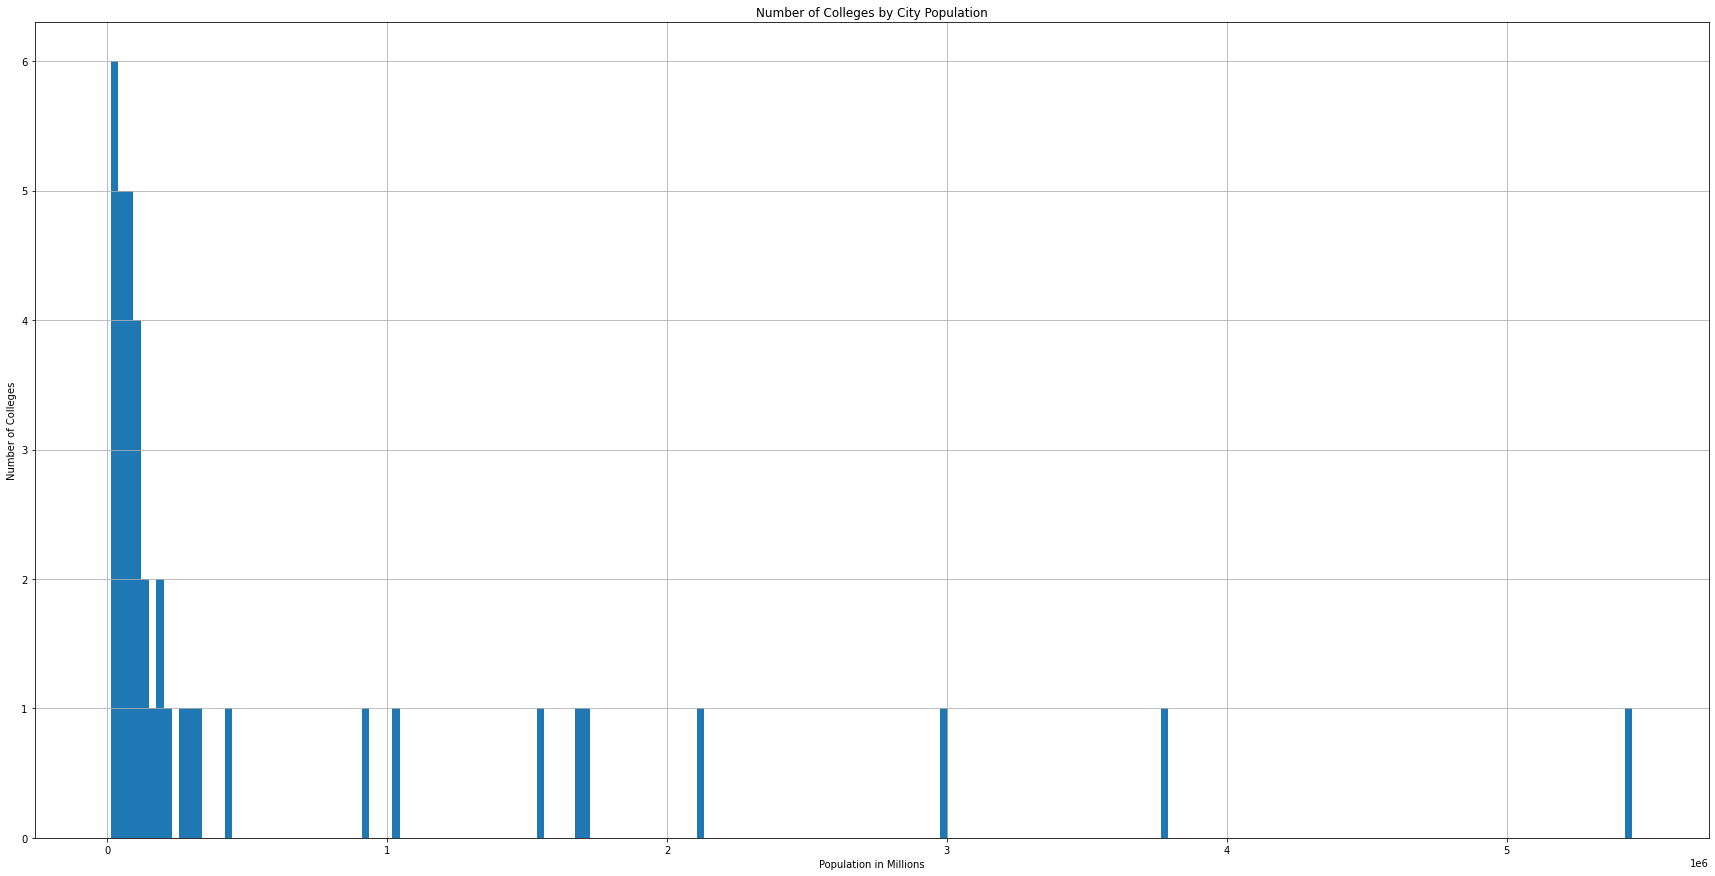

In [29]:
plt.figure(figsize=(30,15))
plt.title('Number of Colleges by City Population')
plt.ylabel('Number of Colleges')
plt.xlabel('Population in Millions')
longer['Population'].hist(bins=200)

## The resultant histogram seems to suggest that students do not need settle for living in cities of certain sizes – that there is a lot of diversity in the sub-500k population. Although this only seems to be the case as we brought in additional schools ranked 21-40.  That suggests that only schools ranked 21-40 afforeded us this population diversity. This begs the question of how correlated ranking might be to population.  Let’s run a correlation on this larger data set to see.

In [30]:
longer.corr()

,Latitude,Longitude,Population,Enrollment,Ranking
Latitude,1.000000,0.164205,0.091029,-0.104973,0.263874
Longitude,0.164205,1.000000,-0.189546,-0.140266,0.248588
Population,0.091029,-0.189546,1.000000,-0.009402,-0.039557
Enrollment,-0.104973,-0.140266,-0.009402,1.000000,-0.133492
Ranking,0.263874,0.248588,-0.039557,-0.133492,1.000000


## We have to remember that this is a pretty small data set from which to measure correlations.  But other than that 100% values we'd expect to see on the diagonal (where a value is correlated with itself) there are virtually no correlations of note.  THe highest is latitude by ranking, but even that's only at .264. Remembering that we look for values that approach 1 or negative one, we have to conclude that geography, population, enrollments, and rankings are fairly independent.  In fact, the comparison we looked at between ranking and city population is so miniscule .04, as to suggest that the factors are almost completely independent given our data set.

## See my PPT and project summary document for more about what conclusions we can reach accordingly.  Thanks for following along!